In [15]:
cd /content/drive/MyDrive/Colab Notebooks/first


/content/drive/MyDrive/Colab Notebooks/first


# import library


In [64]:
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [65]:
# loading training set features
start_time = datetime.now()
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0,0,0,0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4,1)
    train_set.append((train_set_features[i].reshape(102,1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0,0,0,0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4,1)
    test_set.append((test_set_features[i].reshape(102,1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

# print size
print(len(train_set)) #1962
print(len(test_set)) #662


1962
662


### Part 1

In [66]:
minimize_train_set=train_set[:200]

In [73]:
def sigmoid(x):
    ans=1/(1+np.exp(-x))
    return ans
def result(x,w,b):
    return np.dot(w,x)+b

np.random.seed(1)
n_x=102
n_h_1=150
n_h_2=60
n_y=4
#intialize the layers here
W1 = np.random.normal(size=(n_h_1,n_x)) 
b1 = np.zeros((n_h_1,1))
W2 = np.random.normal(size=(n_h_2,n_h_1)) 
b2 = np.zeros((n_h_2,1))
W3 = np.random.normal(size=(n_y,n_h_2)) 
b3 = np.zeros((n_y,1))
counter=0
for i in range(len(minimize_train_set)):
      reshape_train=minimize_train_set[i][0]
      reshape_train_label=minimize_train_set[i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      index = np.where(S3 == np.amax(S3))
      max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
      if index == max_index:
          counter += 1
print("Accuracy is : " +str(counter / 200))



Accuracy is : 0.265


###part 2

epoch_count  1
batch count 1
mini batch num is 1
mini batch num is 2
mini batch num is 3
mini batch num is 4
mini batch num is 5
mini batch num is 6
mini batch num is 7
mini batch num is 8
mini batch num is 9
mini batch num is 10
mini batch num is 11
mini batch num is 12
mini batch num is 13
mini batch num is 14
mini batch num is 15
mini batch num is 16
mini batch num is 17
mini batch num is 18
mini batch num is 19
mini batch num is 20
batch count 2
mini batch num is 1
mini batch num is 2
mini batch num is 3
mini batch num is 4
mini batch num is 5
mini batch num is 6
mini batch num is 7
mini batch num is 8
mini batch num is 9
mini batch num is 10
mini batch num is 11
mini batch num is 12
mini batch num is 13
mini batch num is 14
mini batch num is 15
mini batch num is 16
mini batch num is 17
mini batch num is 18
mini batch num is 19
mini batch num is 20
batch count 3
mini batch num is 1
mini batch num is 2
mini batch num is 3
mini batch num is 4
mini batch num is 5
mini batch num is 6
m

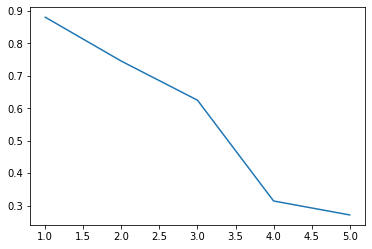

In [68]:
def sigmoid(x):
    ans=1/(1+np.exp(-x))
    return ans
def result(x,w,b):
    return np.dot(w,x)+b
np.random.seed(1)
epoch=5
batch_size=10
batch_num=int(200/10)
learning_rate=0.3
np.random.seed(1)
n_x=102
n_h_1=150
n_h_2=60
n_y=4
#intialize the layers here
W1 = np.random.randn(n_h_1,n_x) 
b1 = np.zeros((n_h_1,1))
W2 = np.random.randn(n_h_2,n_h_1)
b2 = np.zeros((n_h_2,1))
W3 = np.random.randn(n_y,n_h_2) 
b3 = np.zeros((n_y,1))
costs=[]
for epoch_count in range(epoch):
  #shuffle
  total_cost=0
  print("epoch_count  "+str(epoch_count+1))
  random.shuffle(train_set)
  minimize_train_set=train_set[:200]
  for batch_count in range(batch_size):
    print("batch count "+str(batch_count+1))
    grad_W1 = np.zeros((n_h_1,n_x))
    grad_W2 = np.zeros((n_h_2,n_h_1))
    grad_W3 = np.zeros((n_y,n_h_2))
    grad_b1 = np.zeros((n_h_1,1))
    grad_b2 = np.zeros((n_h_2,1))
    grad_b3 = np.zeros((n_y,1)) 
    for i in range(batch_num):
      print("mini batch num is "+str(i+1)) 
      reshape_train=minimize_train_set[batch_count*20+i][0]
      reshape_train_lables=minimize_train_set[batch_count*20+i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      temp_cost=0
      for s in range(len(S3)):
        temp_cost+=pow(S3[s][0]-reshape_train_lables[s][0],2)
      total_cost+=temp_cost
      for j in range(grad_W3.shape[0]):
          for k in range(grad_W3.shape[1]):
              grad_W3[j, k] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0]) * S2[k, 0]
             # print(grad_W3)
      # bias
      for j in range(grad_b3.shape[0]):
              grad_b3[j, 0] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0])
      
      # ---- 3rd layer
      # activation
      delta_3 = np.zeros((n_h_2, 1))
      for k in range(n_h_2):
          for j in range(n_y):
              delta_3[k, 0] += 2 * (S3[j, 0] - reshape_train_lables[j, 0]) * S3[j, 0] * (1 - S3[j, 0]) * W3[j, k]
      
      # weight
      for k in range(grad_W2.shape[0]):
          for m in range(grad_W2.shape[1]):
              grad_W2[k, m] += delta_3[k, 0] * S2[k,0] * (1 - S2[k, 0]) * S1[m, 0]
      
      # bias
      for k in range(grad_b2.shape[0]):
              grad_b2[k, 0] += delta_3[k, 0] * S2[k, 0] * (1 - S2[k, 0])
              
      # ---- 2nd layer
      # activation
      delta_2 = np.zeros((n_h_1, 1))
      for m in range(n_h_1):
          for k in range(n_h_2):
              delta_2[m, 0] += delta_3[k, 0] * S2[k][0] * (1 - S2[k, 0]) * W2[k, m]
      # weight
      for m in range(grad_W1.shape[0]):
          for v in range(grad_W1.shape[1]):
              grad_W1[m, v] += delta_2[m, 0] * S1[m,0] * (1 - S1[m, 0]) * reshape_train[v,0]
              
      # bias
      for m in range(grad_b1.shape[0]):
              grad_b1[m, 0] += delta_2[m, 0] * S1[m, 0] * (1 - S1[m, 0])
             
      W3 = W3 - (learning_rate * (grad_W3 / batch_size))
      W2 = W2 - (learning_rate * (grad_W2 / batch_size))
      W1 = W1 - (learning_rate * (grad_W1 / batch_size))
      b3 = b3 - (learning_rate * (grad_b3 / batch_size))
      b2 = b2 - (learning_rate * (grad_b2 / batch_size))
      b1 = b1 - (learning_rate * (grad_b1 / batch_size))
      
  costs.append(total_cost/200)
  print("cost of this epoch is "+str(total_cost))
  print(S3)
print("average cost : "+str(sum(costs)))
epoch_list=[c+1 for c in range(epoch)]
plt.plot(epoch_list,costs)  
out=[]


In [71]:
counter=0
for i in range(len(minimize_train_set)):
      reshape_train=minimize_train_set[i][0]
      reshape_train_label=minimize_train_set[i][1]
      S0 = reshape_train
      S1 = sigmoid(W1 @ S0 + b1)
      S2 = sigmoid(W2 @ S1 + b2)
      S3 = sigmoid(W3 @ S2 + b3)
      index = np.where(S3 == np.amax(S3))
      max_index = np.where(reshape_train_label == np.amax(reshape_train_label))
      if index == max_index:
          counter += 1
print("Accuracy is : " +str(counter / 200))
       
  

SyntaxError: ignored

##part 3
